# Loading libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


# Experiment with mnist_mlp

In [1]:
# Import necessary libraries and modules.
from __future__ import print_function  # Ensures print function compatibility with Python 2

import keras  # Importing the Keras library
from keras.datasets import mnist  # The MNIST dataset module from Keras
from keras.models import Sequential  # Importing the Sequential model class
from keras.layers import Dense, Dropout  # Importing the layers to be used in the model
from keras.optimizers import RMSprop  # Importing the RMSprop optimizer

# Setting up hyperparameters and constants
batch_size = 128  # Number of samples per gradient update
num_classes = 10  # Number of output classes. In this case, it's the digits 0-9
epochs = 5  # Number of times the model will be trained on the entire dataset

# Loading the MNIST dataset and splitting it into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshaping the data into a 2D array (60000x784 for training and 10000x784 for testing)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Converting data type to float32 for normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data to have values between 0 and 1 (by dividing by 255, the max RGB value)
x_train /= 255
x_test /= 255

# Print the number of training and test samples
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert labels from integer format to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the neural network architecture using Keras' Sequential API
model = Sequential()

# Adding layers to the model:
# - Dense layer with 512 neurons, ReLU activation, and input shape of 784
model.add(Dense(512, activation='relu', input_shape=(784,)))
# - Dropout layer for regularization, dropping 20% of the inputs
model.add(Dropout(0.2))
# - Another Dense layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))
# - Another Dropout layer, dropping 20% of the inputs
model.add(Dropout(0.2))
# - Final Dense output layer with 10 neurons (one for each class) and softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Print a summary of the model's architecture
model.summary()

# Compiling the model with:
# - Categorical crossentropy as the loss function (since it's a multi-class classification problem)
# - RMSprop optimizer for training
# - Accuracy as the performance metric
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Training the model using the training data, with validation on the test data
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Evaluating the model's performance on the test data
score = model.evaluate(x_test, y_test, verbose=0)

# Print the test loss and accuracy results
print('Test loss:', score[0])
print('Test accuracy:', score[1])


11490434/11490434 [==============================] - 2s 0us/step
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable para

# Experiment with mnist_cnn

In [2]:
# Ensures print function compatibility with Python 2
from __future__ import print_function

# Import necessary libraries and modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K  # Importing Keras backend (by default this is TensorFlow)

# Hyperparameters and constants
batch_size = 128
num_classes = 10
epochs = 12

# Dimensions for the input images from MNIST dataset
img_rows, img_cols = 28, 28

# Loading the MNIST dataset and splitting it into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Depending on the data format Keras is set up for, rearrange the data so that the channel is either first or last
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Convert datatype to float32 and normalize data values to range [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Print the shape of training data and number of training and test samples
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors (integers) to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the Convolutional Neural Network architecture using Keras' Sequential API
model = Sequential()

# Adding layers to the model:
# - First convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# - Second convolutional layer with 64 filters and 3x3 kernel size, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# - Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# - Dropout layer for regularization, dropping 25% of the nodes
model.add(Dropout(0.25))
# - Flatten layer to transform input into 1D array
model.add(Flatten())
# - Dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))
# - Dropout layer for regularization, dropping 50% of the nodes
model.add(Dropout(0.5))
# - Output dense layer with 10 neurons (one for each class 0-9) and softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical crossentropy loss, Adadelta optimizer, and accuracy metric
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the model using the training data, with validation on the test data
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluate the model's performance on the test data
score = model.evaluate(x_test, y_test, verbose=0)

# Print test loss and accuracy results
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 11s 10ms/step - loss: 2.2904 - accuracy: 0.1364 - val_loss: 2.2737 - val_accuracy: 0.3297
Epoch 2/12
469/469 [==============================] - 5s 10ms/step - loss: 2.2628 - accuracy: 0.2306 - val_loss: 2.2412 - val_accuracy: 0.4713
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 2.2287 - accuracy: 0.3150 - val_loss: 2.1978 - val_accuracy: 0.5391
Epoch 4/12
469/469 [==============================] - 5s 10ms/step - loss: 2.1814 - accuracy: 0.3930 - val_loss: 2.1380 - val_accuracy: 0.6021
Epoch 5/12
469/469 [==============================] - 5s 10ms/step - loss: 2.1155 - accuracy: 0.4572 - val_loss: 2.0543 - val_accuracy: 0.6623
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 2.0245 - accuracy: 0.5067 - val_loss: 1.9372 - val_accuracy: 0.7081
Epoch 7/12
469/469 [==============================] - 5s 10ms/step - l

# MLP on fashion MNIST

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
print(f"Images shape: {X_train_full.shape}")
print(f"Labels shape: {y_train_full.shape}")
print(f"Images shape: {X_train.shape}")
print(f"Labels shape: {y_train.shape}")
print(f"Images shape: {X_valid.shape}")
print(f"Labels shape: {y_valid.shape}")


Images shape: (60000, 28, 28)
Labels shape: (60000,)
Images shape: (55000, 28, 28)
Labels shape: (55000,)
Images shape: (5000, 28, 28)
Labels shape: (5000,)


Create a function to easily test hyperparameters of the model and output a summary and plot learning curves.

In [26]:
def train_model(epochs=10,
                optimizer_name='adam',
                learning_rate=0.0001,
                initializer='glorot_uniform'):

    # Create the optimizer based on the provided name
    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    model = models.Sequential([
        layers.Flatten(input_shape=[28, 28]),
        layers.Dense(300, activation="relu", kernel_initializer=initializer),
        layers.Dense(100, activation="relu", kernel_initializer=initializer),
        layers.Dense(10, activation="softmax", kernel_initializer=initializer)
    ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=256, validation_split=0.2, verbose=0)

    # Print final results
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
    print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

    # Plot learning curves
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)

    plt.title(f"Optimizer: {optimizer_name.capitalize()}, Learning Rate: {learning_rate:.5f}, Initialization: {initializer}")
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

    return model, history


Model to test hyperparameters without plot and summary outputs.

In [32]:
def train_model_mass(epochs=10,
                optimizer_name='adam',
                learning_rate=0.0001,
                initializer='glorot_uniform'):

    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    model = models.Sequential([
        layers.Flatten(input_shape=[28, 28]),
        layers.Dense(300, activation="relu", kernel_initializer=initializer),
        layers.Dense(100, activation="relu", kernel_initializer=initializer),
        layers.Dense(10, activation="softmax", kernel_initializer=initializer)
    ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model.summary()  # Commented out

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=256, validation_split=0.2, verbose=0)

    return model, history

For loop to test multiple hyperparameter combination simultaneously.

In [37]:
# Define the hyperparameter values to test
optimizers = ['adam', 'sgd', 'RMSprop']
learning_rates = [0.1, 0.01, 0.001, 0.0001]
initializers = ['glorot_uniform', 'he_normal', 'lecun_normal']  # Add more initializers if required

# List to store results
results = []

for opt in optimizers:
    for lr in learning_rates:
        for init in initializers:
            print(f"Training with Optimizer: {opt}, Learning Rate: {lr}, Initializer: {init}")
            model, history = train_model_mass(epochs=10, optimizer_name=opt, learning_rate=lr, initializer=init)

            # Store the results
            final_train_accuracy = history.history['accuracy'][-1]
            final_val_accuracy = history.history['val_accuracy'][-1]
            final_train_loss = history.history['loss'][-1]
            final_val_loss = history.history['val_loss'][-1]

            results.append({
                'Optimizer': opt,
                'Learning Rate': lr,
                'Initializer': init,
                'Training Accuracy': final_train_accuracy,
                'Validation Accuracy': final_val_accuracy,
                'Training Loss': final_train_loss,
                'Validation Loss': final_val_loss
            })

# Convert the results list to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

Training with Optimizer: adam, Learning Rate: 0.1, Initializer: glorot_uniform
Training with Optimizer: adam, Learning Rate: 0.1, Initializer: he_normal
Training with Optimizer: adam, Learning Rate: 0.1, Initializer: lecun_normal
Training with Optimizer: adam, Learning Rate: 0.01, Initializer: glorot_uniform
Training with Optimizer: adam, Learning Rate: 0.01, Initializer: he_normal
Training with Optimizer: adam, Learning Rate: 0.01, Initializer: lecun_normal
Training with Optimizer: adam, Learning Rate: 0.001, Initializer: glorot_uniform
Training with Optimizer: adam, Learning Rate: 0.001, Initializer: he_normal
Training with Optimizer: adam, Learning Rate: 0.001, Initializer: lecun_normal
Training with Optimizer: adam, Learning Rate: 0.0001, Initializer: glorot_uniform
Training with Optimizer: adam, Learning Rate: 0.0001, Initializer: he_normal
Training with Optimizer: adam, Learning Rate: 0.0001, Initializer: lecun_normal
Training with Optimizer: sgd, Learning Rate: 0.1, Initializer:

We observe that the combination of adam optimizer with learning rate of 0.001 and the glorot_uniform initializer has the best performance. Next we will test the model with these parameters by adding a dropout layer to the model.

In [38]:
results_df.sort_values(by='Training Accuracy', ascending=False)

,Optimizer,Learning Rate,Initializer,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
6,adam,0.0010,glorot_uniform,0.910136,0.883636,0.238682,0.326218
8,adam,0.0010,lecun_normal,0.909795,0.886364,0.246004,0.321105
7,adam,0.0010,he_normal,0.909614,0.886818,0.240288,0.317808
31,RMSprop,0.0010,he_normal,0.904409,0.877545,0.255259,0.360511
30,RMSprop,0.0010,glorot_uniform,0.902932,0.884273,0.258313,0.324195
32,RMSprop,0.0010,lecun_normal,0.901545,0.885818,0.265286,0.319591
4,adam,0.0100,he_normal,0.898023,0.877818,0.272361,0.350923
3,adam,0.0100,glorot_uniform,0.896250,0.880545,0.280883,0.345995
5,adam,0.0100,lecun_normal,0.895023,0.871000,0.280685,0.371418
13,sgd,0.1000,he_normal,0.879386,0.873364,0.332208,0.358832


Testing a dropout layer with different values and neuron count for first dense layer for the best model.

In [40]:
# Define the optimizer and initializer based on best parameters
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
initializer = 'glorot_uniform'

# Lists to store results
results = []

# Iterate over the dropout rates and neuron counts
dropout_rates = [0.1, 0.3, 0.5, 0.7]
neuron_counts = [100, 200, 300, 400, 500]

for dropout_rate in dropout_rates:
    for neuron_count in neuron_counts:
        # Define the model
        model = models.Sequential([
            layers.Flatten(input_shape=[28, 28]),
            layers.Dense(neuron_count, activation="relu", kernel_initializer=initializer),
            layers.Dense(100, activation="relu", kernel_initializer=initializer),
            layers.Dropout(dropout_rate),
            layers.Dense(10, activation="softmax", kernel_initializer=initializer)
        ])

        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=5, batch_size=256, validation_split=0.2, verbose=0)

        # Store the results
        final_train_accuracy = history.history['accuracy'][-1]
        final_val_accuracy = history.history['val_accuracy'][-1]
        final_train_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]

        results.append({
            'Neurons in First Layer': neuron_count,
            'Dropout Rate': dropout_rate,
            'Training Accuracy': final_train_accuracy,
            'Validation Accuracy': final_val_accuracy,
            'Training Loss': final_train_loss,
            'Validation Loss': final_val_loss
        })

# Convert results list to DataFrame
layers_results_df = pd.DataFrame(results)

# Sort results by Training Accuracy
layers_sorted_results_df = layers_results_df.sort_values(by='Training Accuracy', ascending=False)


We observe that a dropout rate of 0.1 and 400 neurons in the first layer seems to be optimal for the current parametrization.

In [41]:
layers_sorted_results_df

,Neurons in First Layer,Dropout Rate,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
3,400,0.1,0.891523,0.878727,0.294194,0.335005
4,500,0.1,0.890727,0.875545,0.296264,0.346292
2,300,0.1,0.887818,0.877273,0.306311,0.336693
1,200,0.1,0.886727,0.879273,0.310808,0.337276
8,400,0.3,0.884523,0.876273,0.315420,0.348184
7,300,0.3,0.882568,0.877636,0.326129,0.336856
9,500,0.3,0.882523,0.882818,0.320628,0.332188
5,100,0.3,0.881545,0.876364,0.326756,0.343770
6,200,0.3,0.879705,0.875818,0.327261,0.344355
14,500,0.5,0.877477,0.874545,0.344633,0.349332


# CNN on fashion MNIST

Function to easily test parameters for CNN model.

In [54]:
def train_model_mass_cnn(epochs=5,
                optimizer_name='adam',
                learning_rate=0.0001,
                initializer='glorot_uniform'):

    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    model = models.Sequential([
        layers.Conv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(filters=128, kernel_size=3),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(filters=256, kernel_size=3),
        layers.Flatten(),
        layers.Dense(units=128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(units=64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(units=10, activation='softmax')
        ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model.summary()  # Commented out

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=256, validation_split=0.2, verbose=0)

    return model, history

For loop to easily test multiple parameter combinations for CNN.

In [55]:
# Define the hyperparameter values to test
optimizers = ['adam', 'sgd', 'RMSprop']
learning_rates = [0.1, 0.01, 0.001, 0.0001]
initializers = ['glorot_uniform', 'he_normal', 'lecun_normal']  # Add more initializers if required

# List to store results
results = []

for opt in optimizers:
    for lr in learning_rates:
        for init in initializers:
            print(f"Training with Optimizer: {opt}, Learning Rate: {lr}, Initializer: {init}")
            model, history = train_model_mass_cnn(epochs=10, optimizer_name=opt, learning_rate=lr, initializer=init)

            # Store the results
            final_train_accuracy = history.history['accuracy'][-1]
            final_val_accuracy = history.history['val_accuracy'][-1]
            final_train_loss = history.history['loss'][-1]
            final_val_loss = history.history['val_loss'][-1]

            results.append({
                'Optimizer': opt,
                'Learning Rate': lr,
                'Initializer': init,
                'Training Accuracy': final_train_accuracy,
                'Validation Accuracy': final_val_accuracy,
                'Training Loss': final_train_loss,
                'Validation Loss': final_val_loss
            })

# Convert the results list to a DataFrame for easier viewing
cnn_results_df = pd.DataFrame(results)

Training with Optimizer: adam, Learning Rate: 0.1, Initializer: glorot_uniform
Training with Optimizer: adam, Learning Rate: 0.1, Initializer: he_normal
Training with Optimizer: adam, Learning Rate: 0.1, Initializer: lecun_normal
Training with Optimizer: adam, Learning Rate: 0.01, Initializer: glorot_uniform
Training with Optimizer: adam, Learning Rate: 0.01, Initializer: he_normal
Training with Optimizer: adam, Learning Rate: 0.01, Initializer: lecun_normal
Training with Optimizer: adam, Learning Rate: 0.001, Initializer: glorot_uniform
Training with Optimizer: adam, Learning Rate: 0.001, Initializer: he_normal
Training with Optimizer: adam, Learning Rate: 0.001, Initializer: lecun_normal
Training with Optimizer: adam, Learning Rate: 0.0001, Initializer: glorot_uniform
Training with Optimizer: adam, Learning Rate: 0.0001, Initializer: he_normal
Training with Optimizer: adam, Learning Rate: 0.0001, Initializer: lecun_normal
Training with Optimizer: sgd, Learning Rate: 0.1, Initializer:

We observe that the combination of adam optimizer with learning rate of 0.001 and the he_normal initializer has the best performance. Next we will test the model with these parameters on dropout values and filter size of the first filter.

In [57]:
sorted_cnn_results_df = cnn_results_df.sort_values(by='Training Accuracy', ascending=False)
sorted_cnn_results_df

,Optimizer,Learning Rate,Initializer,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
7,adam,0.0010,he_normal,0.893705,0.883455,3.162415e-01,0.331603
31,RMSprop,0.0010,he_normal,0.891614,0.881182,3.210863e-01,0.348593
8,adam,0.0010,lecun_normal,0.890795,0.883636,3.187003e-01,0.325657
32,RMSprop,0.0010,lecun_normal,0.890227,0.886455,3.203685e-01,0.325194
30,RMSprop,0.0010,glorot_uniform,0.889955,0.880545,3.240539e-01,0.358922
6,adam,0.0010,glorot_uniform,0.888114,0.884182,3.243597e-01,0.326266
14,sgd,0.1000,lecun_normal,0.834909,0.861000,4.685254e-01,0.387738
13,sgd,0.1000,he_normal,0.829159,0.848818,4.866250e-01,0.410543
12,sgd,0.1000,glorot_uniform,0.826205,0.850273,4.907702e-01,0.413836
11,adam,0.0001,lecun_normal,0.784205,0.827636,6.157952e-01,0.480430


For loop to test filter size and dropout rate for the optimal parameters we found in the previous step.

In [60]:
# Define the optimizer and initializer based on best parameters
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
initializer = 'he_normal'

# Lists to store results
results = []

# Iterate over the dropout rates and filter counts
dropout_rates = [0.1, 0.3, 0.5, 0.7]
filter_counts = [16, 32, 64, 128]

for dropout_rate in dropout_rates:
    for filter_count in filter_counts:
        # Define the model
        model = models.Sequential([
          layers.Conv2D(filters=filter_count, kernel_size=7, input_shape=[28, 28, 1]),
          layers.MaxPooling2D(pool_size=2),
          layers.Conv2D(filters=128, kernel_size=3),
          layers.MaxPooling2D(pool_size=2),
          layers.Conv2D(filters=256, kernel_size=3),
          layers.Flatten(),
          layers.Dense(units=128, activation='relu'),
          layers.Dropout(dropout_rate),
          layers.Dense(units=64, activation='relu'),
          layers.Dropout(dropout_rate),
          layers.Dense(units=10, activation='softmax')
        ])

        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=5, batch_size=256, validation_split=0.2, verbose=0)

        # Store the results
        final_train_accuracy = history.history['accuracy'][-1]
        final_val_accuracy = history.history['val_accuracy'][-1]
        final_train_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]

        results.append({
            'Filters in First Layer': filter_count,
            'Dropout Rate': dropout_rate,
            'Training Accuracy': final_train_accuracy,
            'Validation Accuracy': final_val_accuracy,
            'Training Loss': final_train_loss,
            'Validation Loss': final_val_loss
        })

# Convert results list to DataFrame
cnn_layers_results_df = pd.DataFrame(results)

# Sort results by Training Accuracy
cnn_layers_sorted_results_df = cnn_layers_results_df.sort_values(by='Training Accuracy', ascending=False)

We observe that a dropout rate of 0.1 and 16 filters in the first layer seems to be optimal for the current parametrization.

In [61]:
cnn_layers_sorted_results_df

,Filters in First Layer,Dropout Rate,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,16,0.1,0.880955,0.882182,0.322383,0.333472
1,32,0.1,0.880932,0.878091,0.328253,0.337044
2,64,0.1,0.871568,0.875545,0.353251,0.345322
5,32,0.3,0.852818,0.870091,0.413191,0.359213
4,16,0.3,0.849341,0.861455,0.419925,0.385211
8,16,0.5,0.838114,0.861364,0.464035,0.389387
6,64,0.3,0.835591,0.851182,0.459887,0.410163
3,128,0.1,0.833795,0.847818,0.452444,0.416717
9,32,0.5,0.815705,0.839273,0.506619,0.432383
7,128,0.3,0.797045,0.823455,0.552585,0.479008


# Use the 3 best hyperparameter settings to train new models on CFIAR-10

Load CFIAR data.

In [63]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 18s 0us/step


Function to train best MLP model on CFIAR data.

In [66]:
def train_model_CFIAR(epochs=10,
                optimizer_name='adam',
                learning_rate=0.0001,
                initializer='glorot_uniform'):

    # Create the optimizer based on the provided name
    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    model = models.Sequential([
            layers.Flatten(input_shape=[32, 32, 3]),
            layers.Dense(400, activation="relu", kernel_initializer=initializer),
            layers.Dense(100, activation="relu", kernel_initializer=initializer),
            layers.Dropout(0.1),
            layers.Dense(10, activation="softmax", kernel_initializer=initializer)
        ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=256, validation_split=0.2, verbose=0)

    # Print final results
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
    print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

    # Plot learning curves
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)

    plt.title(f"Optimizer: {optimizer_name.capitalize()}, Learning Rate: {learning_rate:.5f}, Initialization: {initializer}")
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

    return model, history


Test MLP on CFIAR data.

Model: "sequential_214"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_213 (Flatten)       (None, 3072)              0         
                                                                 
 dense_641 (Dense)           (None, 400)               1229200   
                                                                 
 dense_642 (Dense)           (None, 100)               40100     
                                                                 
 dropout_141 (Dropout)       (None, 100)               0         
                                                                 
 dense_643 (Dense)           (None, 10)                1010      
                                                                 
Total params: 1270310 (4.85 MB)
Trainable params: 1270310 (4.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Final Training

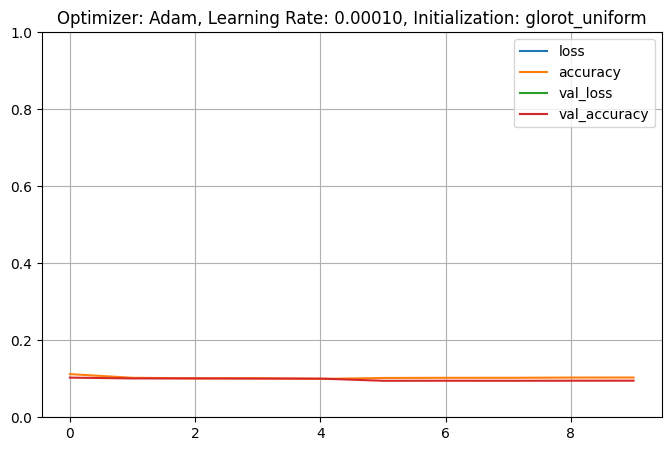

(<keras.src.engine.sequential.Sequential at 0x7bd5a8139e40>,
 <keras.src.callbacks.History at 0x7bd5a81c78e0>)

In [67]:
train_model_CFIAR()

Function to train best CNN model on CFIAR data with 16 filters on first layer.

In [78]:
def cnn_train_model_CFIAR(epochs=10,
                optimizer_name='adam',
                learning_rate=0.0001,
                initializer='he_normal'):

    # Create the optimizer based on the provided name
    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    model = models.Sequential([
          layers.Conv2D(filters=16, kernel_size=7, input_shape=[32, 32, 3]),
          layers.MaxPooling2D(pool_size=2),
          layers.Conv2D(filters=128, kernel_size=3),
          layers.MaxPooling2D(pool_size=2),
          layers.Conv2D(filters=256, kernel_size=3),
          layers.Flatten(),
          layers.Dense(units=128, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(units=64, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(units=10, activation='softmax')
        ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=256, validation_split=0.2, verbose=0)

    # Print final results
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
    print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

    # Plot learning curves
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)

    plt.title(f"Optimizer: {optimizer_name.capitalize()}, Learning Rate: {learning_rate:.5f}, Initialization: {initializer}")
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

    return model, history

We will now test the CNN with 16 filters in the first layer.

Model: "sequential_219"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_189 (Conv2D)         (None, 26, 26, 16)        2368      
                                                                 
 max_pooling2d_125 (MaxPool  (None, 13, 13, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_190 (Conv2D)         (None, 11, 11, 128)       18560     
                                                                 
 max_pooling2d_126 (MaxPool  (None, 5, 5, 128)         0         
 ing2D)                                                          
                                                                 
 conv2d_191 (Conv2D)         (None, 3, 3, 256)         295168    
                                                                 
 flatten_218 (Flatten)       (None, 2304)           

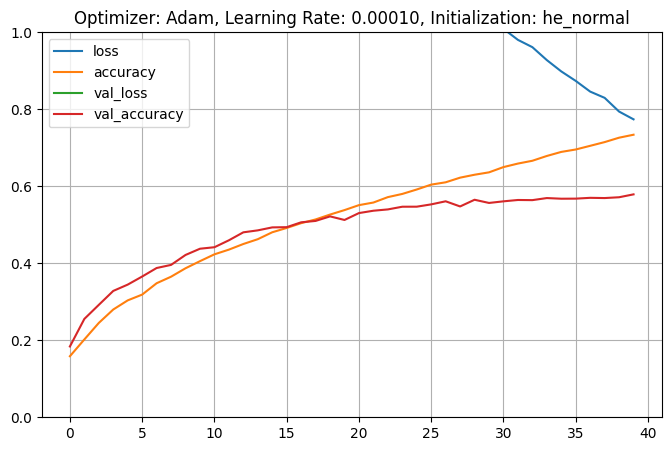

(<keras.src.engine.sequential.Sequential at 0x7bd590043f40>,
 <keras.src.callbacks.History at 0x7bd5900587f0>)

In [79]:
cnn_train_model_CFIAR(epochs=40)

Function to train best CNN model on CFIAR data with 64 filters on first layer.

In [73]:
def cnn_train_model_CFIAR_filters64(epochs=10,
                optimizer_name='adam',
                learning_rate=0.0001,
                initializer='he_normal'):

    # Create the optimizer based on the provided name
    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    model = models.Sequential([
          layers.Conv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
          layers.MaxPooling2D(pool_size=2),
          layers.Conv2D(filters=128, kernel_size=3),
          layers.MaxPooling2D(pool_size=2),
          layers.Conv2D(filters=256, kernel_size=3),
          layers.Flatten(),
          layers.Dense(units=128, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(units=64, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(units=10, activation='softmax')
        ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=256, validation_split=0.2, verbose=0)

    # Print final results
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
    print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

    # Plot learning curves
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)

    plt.title(f"Optimizer: {optimizer_name.capitalize()}, Learning Rate: {learning_rate:.5f}, Initialization: {initializer}")
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

    return model, history

We will now test the CNN with 64 filters in the first layer.

Model: "sequential_217"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_183 (Conv2D)         (None, 26, 26, 64)        9472      
                                                                 
 max_pooling2d_121 (MaxPool  (None, 13, 13, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_184 (Conv2D)         (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_122 (MaxPool  (None, 5, 5, 128)         0         
 ing2D)                                                          
                                                                 
 conv2d_185 (Conv2D)         (None, 3, 3, 256)         295168    
                                                                 
 flatten_216 (Flatten)       (None, 2304)           

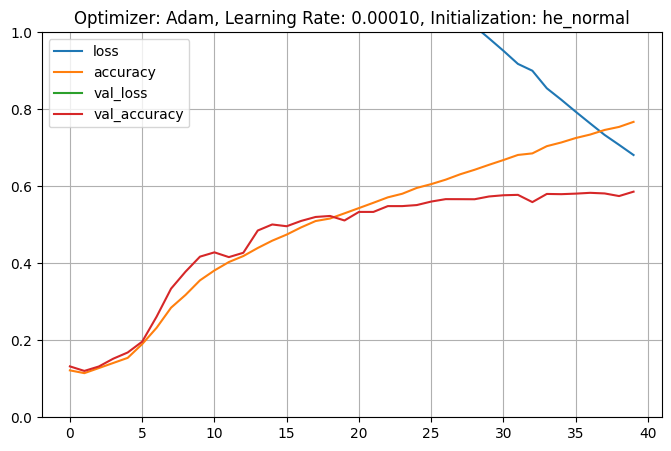

(<keras.src.engine.sequential.Sequential at 0x7bd5b249d420>,
 <keras.src.callbacks.History at 0x7bd5b24d8700>)

In [74]:
cnn_train_model_CFIAR_filters64(epochs=40)

It seems that CNN outperforms MLP on the CIFAR-10 dataset.This is to be expected as the CNN's depth nicely allows it to capture patterns in multi-channel inputs.

The CNN with 16 filters in the first layer seems to be a bit more stable, but the 64 variant reaches a higher accuracy.